## 📊 **Dataset:**

```python
import pandas as pd

data = {
    'State': ['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
              'Colorado', 'Connecticut', 'Delaware', 'Florida', 'Georgia',
              'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa'],
    'Region': ['South', 'West', 'West', 'South', 'West',
               'West', 'Northeast', 'South', 'South', 'South',
               'West', 'West', 'Midwest', 'Midwest', 'Midwest'],
    'Population': [4779736, 710231, 6392017, 2915918, 37253956,
                   5029196, 3574097, 897934, 18801310, 9687653,
                   1360301, 1567582, 12830632, 6483802, 3046355],
    'Murder.Rate': [5.7, 5.6, 4.7, 5.6, 4.4,
                    2.8, 2.4, 5.8, 5.2, 6.0,
                    1.8, 2.3, 5.5, 5.7, 1.9],
    'Unemployment.Rate': [6.8, 7.6, 8.3, 7.9, 9.0,
                          6.0, 5.1, 7.5, 10.2, 9.8,
                          4.7, 5.4, 8.8, 7.1, 4.3]
}

state = pd.DataFrame(data)
```

---

## 🧠 Quiz: Exploring Two or More Variables

### 📘 PART A: Numerical and Categorical Relationships

**Q1. Conditional Boxplot**
Create a **boxplot** that shows the distribution of *Murder.Rate* by *Region*.
Then answer: Which region has the highest median murder rate? Which has the widest spread?



**Q2. Grouped Summary Statistics**
Compute the **mean** and **standard deviation** of *Unemployment.Rate* grouped by *Region*.

* Which region has the **highest average unemployment rate**?
* Which region has the **most variation** in unemployment rate?



**Q3. Correlation by Subgroup**
Compute the **correlation between Population and Murder.Rate** for each Region separately.
Which region shows the **strongest** and **weakest** correlation?



### 📘 PART B: Scatterplots and Relationships

**Q4. Trend in Scatterplot**
Plot a scatterplot of *Population vs. Murder.Rate*.

* Is there any obvious trend or pattern?
* Would you consider this a strong relationship?



**Q5. Faceted Scatterplots**
Create faceted scatterplots (or use grouping) of *Population vs. Murder.Rate*, split by *Region*.

* Do the patterns differ by region?
* Is the trend clearer in any one region?



**Q6. Conceptual: Simpson’s Paradox**
Briefly explain what **Simpson’s Paradox** is, and provide a **hypothetical example** of how it might appear in this data (or similar datasets).



# Answers:

Import dataset:

In [1]:
import pandas as pd

data = {
    'State': ['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
              'Colorado', 'Connecticut', 'Delaware', 'Florida', 'Georgia',
              'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa'],
    'Region': ['South', 'West', 'West', 'South', 'West',
               'West', 'Northeast', 'South', 'South', 'South',
               'West', 'West', 'Midwest', 'Midwest', 'Midwest'],
    'Population': [4779736, 710231, 6392017, 2915918, 37253956,
                   5029196, 3574097, 897934, 18801310, 9687653,
                   1360301, 1567582, 12830632, 6483802, 3046355],
    'Murder.Rate': [5.7, 5.6, 4.7, 5.6, 4.4,
                    2.8, 2.4, 5.8, 5.2, 6.0,
                    1.8, 2.3, 5.5, 5.7, 1.9],
    'Unemployment.Rate': [6.8, 7.6, 8.3, 7.9, 9.0,
                          6.0, 5.1, 7.5, 10.2, 9.8,
                          4.7, 5.4, 8.8, 7.1, 4.3]
}

state = pd.DataFrame(data)

View the data set:

In [2]:
state

,State,Region,Population,Murder.Rate,Unemployment.Rate
0,Alabama,South,4779736,5.7,6.8
1,Alaska,West,710231,5.6,7.6
2,Arizona,West,6392017,4.7,8.3
3,Arkansas,South,2915918,5.6,7.9
4,California,West,37253956,4.4,9.0
5,Colorado,West,5029196,2.8,6.0
6,Connecticut,Northeast,3574097,2.4,5.1
7,Delaware,South,897934,5.8,7.5
8,Florida,South,18801310,5.2,10.2
9,Georgia,South,9687653,6.0,9.8


**Q1. Conditional Boxplot**
Create a **boxplot** that shows the distribution of *Murder.Rate* by *Region*.
Then answer: Which region has the highest median murder rate? Which has the widest spread?


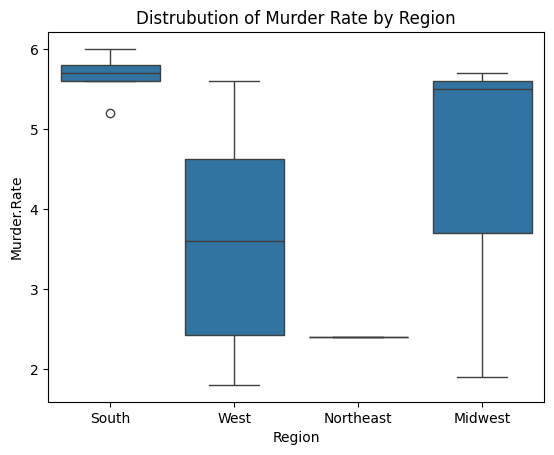

In [3]:
# import libraries that may be useful:
import matplotlib.pyplot as plt
import seaborn as sns

# Create the boxplot
sns.boxplot(x='Region', y='Murder.Rate', data=state)

# Add title and labels
plt.title('Distrubution of Murder Rate by Region')
plt.xlabel('Region')
plt.ylabel('Murder.Rate')

# Show the plot
plt.show()

**Answer:** It seems the South has the highest median murder rate while the West has the widest spread.

**Q2. Grouped Summary Statistics**
Compute the **mean** and **standard deviation** of *Unemployment.Rate* grouped by *Region*.

* Which region has the **highest average unemployment rate**?
* Which region has the **most variation** in unemployment rate?


Check the mean:

In [4]:
# Compute the mean
region_mean = state[["Region", "Unemployment.Rate"]].groupby(["Region"]).mean().rename(columns={"Unemployment.Rate": "Mean"})

# Compute the standard deviation
region_std = state[["Region", "Unemployment.Rate"]].groupby(["Region"]).std().rename(columns={"Unemployment.Rate": "Standard Deviation"})

# Join them together through the index
region_mean_std = pd.concat([region_mean, region_std], axis=1)
region_mean_std

,Mean,Standard Deviation
Region,,
Midwest,6.733333,2.272297
Northeast,5.100000,NaN
South,8.440000,1.484251
West,6.833333,1.716586


**Answer:** The South has the highest average unemployment rate while the Midwest has the most variation in unemployment rate.

**Q3. Correlation by Subgroup**
Compute the **correlation between Population and Murder.Rate** for each Region separately.
Which region shows the **strongest** and **weakest** correlation?


In [18]:
# Get the names of each region
regions = state['Region'].unique()

# Loop through all the regions:
for i in range(len(regions)):
    # store region name
    region_name = regions[i]
    
    # Create mask to filter by region
    mask = state['Region'] == region_name
    
    # Create new variable to store filtered dataframe
    filt_state = state[mask]
    
    # Calculate correlation
    corr = filt_state['Population'].corr(filt_state['Murder.Rate'])

    # Print out the results:
    print(f"{region_name}  Correlation: {corr}")

South  Correlation: -0.6144519966593066
West  Correlation: 0.2779682887585393
Northeast  Correlation: nan
Midwest  Correlation: 0.7382013577121634


The Midwest shows the **highest** correlation between population and murder rate while the West shows the **lowest** correlation. The Northeast doesn't have a valid correlation because there was only one data point for it.

**Q4. Trend in Scatterplot**
Plot a scatterplot of *Population vs. Murder.Rate*.

* Is there any obvious trend or pattern?
* Would you consider this a strong relationship?

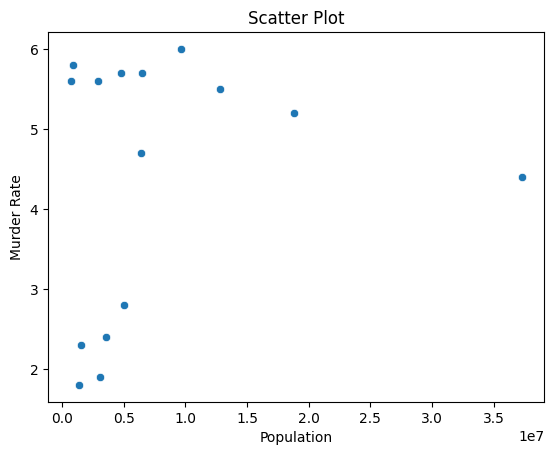

In [29]:
sns.scatterplot(data=state, x="Population", y="Murder.Rate")
plt.title("Scatter Plot")
plt.xlabel("Population")
plt.ylabel("Murder Rate")
plt.show()

**Observation:** It appears that there is weak positive correlation between Population and the murder rate. However there also appears to be an outlier in the data set that might be affecting the level of correlation in the data. Let's confirm the overall correlation:

In [31]:
print(state['Population'].corr(state['Murder.Rate']))

0.19288762480458216


As the result implies, the correlation is a very weak positive one without enough meaning to infer that higher populations may increase crime rates.

**Q5. Faceted Scatterplots**
Create faceted scatterplots (or use grouping) of *Population vs. Murder.Rate*, split by *Region*.

* Do the patterns differ by region?
* Is the trend clearer in any one region?


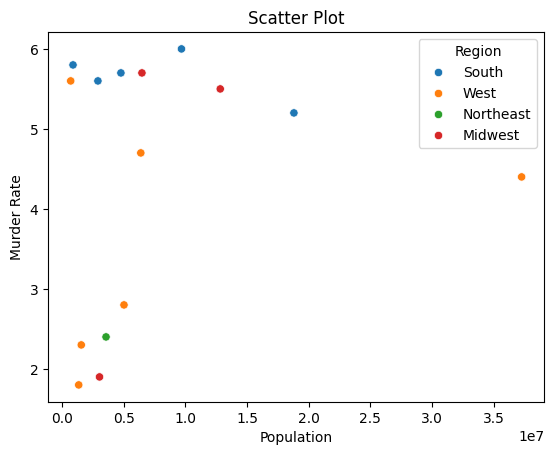

In [32]:
sns.scatterplot(data=state, x="Population", y="Murder.Rate", hue="Region")
plt.title("Scatter Plot")
plt.xlabel("Population")
plt.ylabel("Murder Rate")
plt.show()

**Observation:** It apppears that the South's correlation looks different from the rest. Here the *murder rate* starts higher than for the rest and appears to decrease as the population increases. 

It could be considered a negative relationship if it wasn't for the fact the data points are too few to make a correct assumption.

**Q6. Conceptual: Simpson’s Paradox**
Briefly explain what **Simpson’s Paradox** is, and provide a **hypothetical example** of how it might appear in this data (or similar datasets).


Simpson's Paradox, in simple terms, is a statistical phenomenon where a trend appears in several groups of data but disappears or reverses when the groups are combined. This happens because a hidden variable, or confounder, is influencing the relationship. 

**Example:**
Imagine two football teams, A and B. Team A wins 10 out of 20 games, and Team B wins 8 out of 20 games. It looks like Team A is slightly better. However, if you break it down by month, in the first month, Team A wins 0 out of 5 games, while Team B wins 4 out of 5. In the second month, Team A wins 10 out of 15 games, and Team B wins 4 out of 15. It appears Team A is performing better overall, but this is because the second month had many more games, skewing the results. 